# Ejericio Clustering
El objetivo es implementar un modelo que agrupa las transacciones apropiadamente y encontrar los potenciales outliers, es decir, aquellas transacciones que son sospechosas de ser un fraude o un error. Para resolver este ejercicio correctamente hay que investigar, en vez de simplemente seguir a rajatabla lo enseñado en el curso.

**Pistas:**

- Hemos explicado un algoritmo de clustering que no solo asigna elementos a clusters válidos, sino que también clasifica elementos como valores extremos (outliers). 


In [39]:
import pandas as pd
df=pd.read_csv("./Datos/CC General.csv")

### Solución

In [40]:
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2042,C12105,1007.362008,1.0,469.92,0.00,469.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,716.423692,871.852779,0.000000,12
79,C10083,6593.820644,1.0,388.66,388.66,0.00,4621.934580,0.583333,0.583333,0.000000,0.416667,7,7,7000.0,1624.583114,2503.402340,0.000000,12
6450,C16627,218.280031,1.0,939.14,939.14,0.00,0.000000,0.727273,0.727273,0.000000,0.000000,0,8,5000.0,969.130835,168.333790,0.000000,11
4445,C14569,1689.238956,1.0,261.89,139.19,122.70,0.000000,0.416667,0.083333,0.333333,0.000000,0,7,1700.0,309.348573,1196.937133,0.000000,12
4396,C14519,7677.565407,1.0,1240.04,1240.04,0.00,3681.231518,0.750000,0.750000,0.000000,0.333333,4,20,8000.0,2724.967965,2726.278972,0.000000,12
2676,C12753,1565.577135,1.0,0.00,0.00,0.00,2676.476175,0.000000,0.000000,0.000000,0.333333,6,0,3000.0,3418.679368,477.674801,0.090909,12
2746,C12825,4202.169500,1.0,462.00,462.00,0.00,4776.104770,0.166667,0.166667,0.000000,0.416667,10,2,8000.0,1010.799168,1541.756326,0.000000,12
4012,C14126,5376.338384,1.0,5899.35,3732.48,2166.87,0.000000,1.000000,0.750000,0.916667,0.000000,0,112,6000.0,2816.619335,2785.379085,0.000000,12
7926,C18141,188.132508,1.0,515.88,79.00,436.88,0.000000,0.833333,0.083333,0.750000,0.000000,0,14,2700.0,601.729266,194.534934,0.000000,12
1787,C11847,4372.395867,1.0,569.91,569.91,0.00,520.844673,0.272727,0.272727,0.000000,0.272727,9,5,4500.0,1345.099869,3937.465141,0.000000,11


In [41]:
df.shape

(8950, 18)

In [42]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [43]:
customer_ids = df.CUST_ID
df = df.drop(columns="CUST_ID")

In [44]:
df.columns[df.isnull().any()]

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

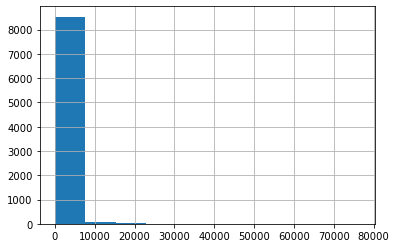

In [45]:
df['MINIMUM_PAYMENTS'].hist();

In [46]:
from sklearn.tree import DecisionTreeRegressor
X_train=df[~df["MINIMUM_PAYMENTS"].isna()].drop(columns=["CREDIT_LIMIT","MINIMUM_PAYMENTS"])
y_train=df[~df["MINIMUM_PAYMENTS"].isna()]["MINIMUM_PAYMENTS"]
X_test=df[df["MINIMUM_PAYMENTS"].isna()].drop(columns=["CREDIT_LIMIT","MINIMUM_PAYMENTS"])

In [48]:
arbol=DecisionTreeRegressor()
arbol.fit(X_train,y_train)
y_predicho=arbol.predict(X_test)

In [50]:
arbol.score(X_train,y_train)

1.0

In [51]:
arbol.feature_importances_

array([0.2863285 , 0.00155224, 0.01545622, 0.02317754, 0.1579803 ,
       0.00965778, 0.00960363, 0.00536714, 0.05948626, 0.00917927,
       0.06238976, 0.04866667, 0.27347474, 0.00261514, 0.03506482])

<AxesSubplot:>

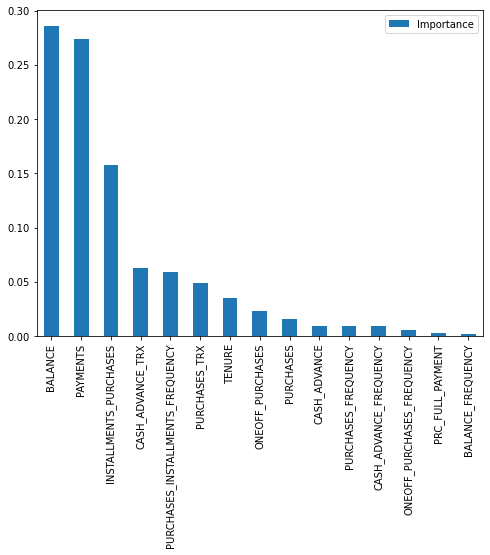

In [52]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(arbol.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [49]:
y_predicho

array([4.08047254e+03, 1.64157328e+04, 2.71460268e+04, 1.11302700e+00,
       4.08047254e+03, 2.71460268e+04, 2.54557160e+01, 4.08047254e+03,
       1.64157328e+04, 2.71460268e+04, 5.58800000e-02, 4.76368900e+00,
       2.71460268e+04, 4.08047254e+03, 2.80618072e+02, 1.66360313e+02,
       6.10316186e+04, 4.60222490e+01, 6.10316186e+04, 4.08047254e+03,
       5.58800000e-02, 1.61218330e+01, 5.41338553e+03, 1.74299229e+02,
       1.17892476e+02, 3.85121248e+04, 2.61431705e+04, 1.74958496e+02,
       3.92228550e+03, 1.15177720e+03, 1.33954340e+01, 6.95611180e+01,
       1.93738387e+02, 6.10316186e+04, 7.41638600e+01, 1.39674841e+02,
       2.71460268e+04, 3.08733881e+03, 1.36064600e+01, 5.58800000e-02,
       1.93290340e+01, 4.95894474e+03, 5.02607595e+04, 1.32663819e+04,
       6.91248340e+01, 7.75132133e+03, 3.92228550e+03, 1.35643912e+04,
       1.93934077e+02, 4.08047254e+03, 4.08047254e+03, 1.33337940e+04,
       1.91630000e-02, 4.08047254e+03, 1.64157328e+04, 4.08047254e+03,
      

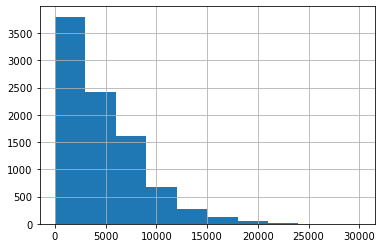

In [33]:
df['CREDIT_LIMIT'].hist();

In [6]:
df[df.isnull().any(axis=1)].shape

(314, 17)

Imputamos a 0 los valores nulos, así podemos ver si los elementos anómalos son aquellos que tienen estas columnas a 0

In [7]:
df = df.fillna(0)

Utilizo el algoritmo DBSCAN.
Y utilizo el StandardScaler para que todos los valores esten en la misma escala

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [10]:
df_normalizado = pd.DataFrame(StandardScaler().fit_transform(df))

In [13]:
clusterer = DBSCAN()
cluster_labels = clusterer.fit_predict(df_normalizado)
## muestro el top 5
pd.Series(cluster_labels).value_counts()[:5]

-1     6627
 0     1948
 10      60
 2       34
 15      30
dtype: int64

In [14]:
pd.Series(cluster_labels).value_counts(normalize=True)[:5]

-1     0.740447
 0     0.217654
 10    0.006704
 2     0.003799
 15    0.003352
dtype: float64

DBSCAN etiqueta practicamente un 75% de valores como -1. Usamos el coeficiente de silueta (`silhouette_score`) para ver como etiqueta el algoritmo

In [12]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(df_normalizado, cluster_labels)

-0.46596190778573116

El valor es negativo, con lo que quiere decir que la segmetnación es bastante mala

In [16]:
### Veamos los hiperparamentros que hemos utilizado
DBSCAN().get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

Vamos a realizar un similar a GridSearch para este modelo. ya que al no tener predict no podemos usar este o RandomSearch

In [17]:
from scipy.stats import uniform,randint

distribucion_parametros = {
    "eps": uniform(0,5),
    "min_samples": randint(2, 20),
    "p": randint(1, 3),
}

In [18]:
import numpy as np
from sklearn.model_selection import ParameterSampler

n_muestras = 30 # probamos 30 combinaciones de hiperparámetros
n_iteraciones = 2 #para validar, vamos a entrenar para cada 
                  # selección de hiperparámetros en 2 muestras distintas
pct_muestra = 0.7 # usamos el 70% de los datos para entrenar el modelo en cada iteracion
resultados_busqueda = []
lista_parametros = list(ParameterSampler(distribucion_parametros, n_iter=n_muestras))

for param in lista_parametros:
    for iteration in range(n_iteraciones):
        param_resultados = []
        muestra = df_normalizado.sample(frac=pct_muestra)
        etiquetas_clusters = DBSCAN(n_jobs=-1, **param).fit_predict(muestra)
        try:
            param_resultados.append(silhouette_score(muestra, etiquetas_clusters))
        except ValueError: # a veces silhouette_score falla en los casos en los que solo hay 1 cluster
            pass
    puntuacion_media = np.mean(param_resultados)
    resultados_busqueda.append([puntuacion_media, param])

In [21]:
Parametros=sorted(resultados_busqueda, key=lambda x: x[0], reverse=True)[:5]

In [54]:
Parametros

[[0.7434661571147867, {'eps': 4.9131508354483024, 'min_samples': 9, 'p': 2}],
 [0.7063416004981943, {'eps': 4.219331920901258, 'min_samples': 8, 'p': 1}],
 [0.7044269732294878, {'eps': 4.555995114916546, 'min_samples': 13, 'p': 2}],
 [0.6880736562238529, {'eps': 4.062499754338706, 'min_samples': 12, 'p': 2}],
 [0.673539678153304, {'eps': 3.706336751766966, 'min_samples': 7, 'p': 2}]]

Cojo el primer valor que he obtenido

In [25]:
mejores_params = Parametros[0][1]

clusterer = DBSCAN(n_jobs=-1, **mejores_params)

etiquetas_cluster = clusterer.fit_predict(df_normalizado)

In [26]:
pd.Series(etiquetas_cluster).value_counts()

 0    8887
-1      63
dtype: int64

Vemos que hay 63 que se consideran anomalos

In [27]:
def resumen_cluster(cluster_id):
    cluster = df[etiquetas_cluster==cluster_id]
    resumen_cluster = cluster.mean().to_dict()
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes = []
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [28]:
comparar_clusters(0,-1)

cluster_id,0,-1
BALANCE,1532.610082,6059.427090
BALANCE_FREQUENCY,0.876726,0.954161
PURCHASES,911.208148,13980.578571
ONEOFF_PURCHASES,531.291612,9217.871587
INSTALLMENTS_PURCHASES,380.218846,4762.706984
CASH_ADVANCE,942.881046,6055.755574
PURCHASES_FREQUENCY,0.488374,0.769216
ONEOFF_PURCHASES_FREQUENCY,0.200215,0.518762
PURCHASES_INSTALLMENTS_FREQUENCY,0.362407,0.650883
CASH_ADVANCE_FREQUENCY,0.134068,0.286917
